In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv',index_col="CustomerID")

In [ ]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
la=LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
scaler=StandardScaler

In [ ]:
columns=df.columns

In [ ]:
def get_best_cluster(data,n_cluster):
    acc={}
    for k in range(1,n_cluster):
        model=KMeans(n_clusters=k,n_init=15)
        model.fit(data)
        acc[k]=model.inertia_
    plt.plot(acc.keys(),acc.values(),marker=".")
    plt.xlabel("Count of Clusters")
    plt.ylabel("Error")
    plt.title("Find the best numbers of Clustering for Kmeans")
    return acc

In [ ]:
def train_plot(data,n_clusters):
    data=data.copy()
    model=KMeans(n_clusters=n_clusters,n_init=50)
    pre=model.fit_predict(data)
    data['Group']=pre
    for k in range(n_clusters):
        plt.scatter(data[data['Group']==k]["Annual Income (k$)"],data[data['Group']==k]["Spending Score (1-100)"],
                    label=f"Group {k+1}")
    plt.title("Customer Groups")
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.legend()
    return pre


{1: 308862.06000000006,
 2: 212889.44245524303,
 3: 143391.59236035676,
 4: 104414.67534220168,
 5: 75399.61541401484,
 6: 58348.641363315044,
 7: 51132.703212576904,
 8: 44357.6215098352,
 9: 40895.633300495785,
 10: 37175.97669994118,
 11: 35008.512254003974}

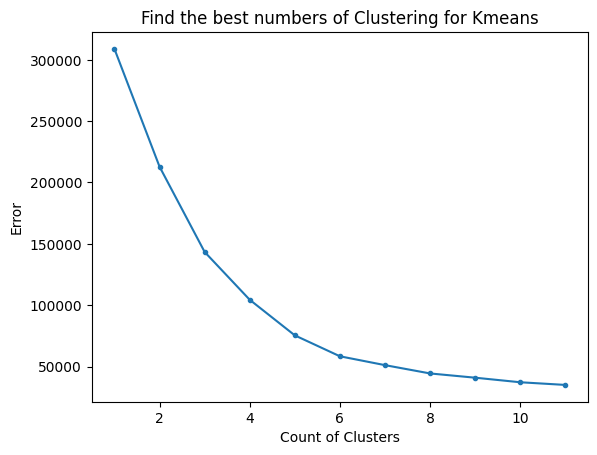

In [ ]:
acc_df=get_best_cluster(df,12)
acc_df

In [ ]:
acc_scaled=get_best_cluster(df_scaled,12)
acc_scaled

NameError: name 'df_scaled' is not defined

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

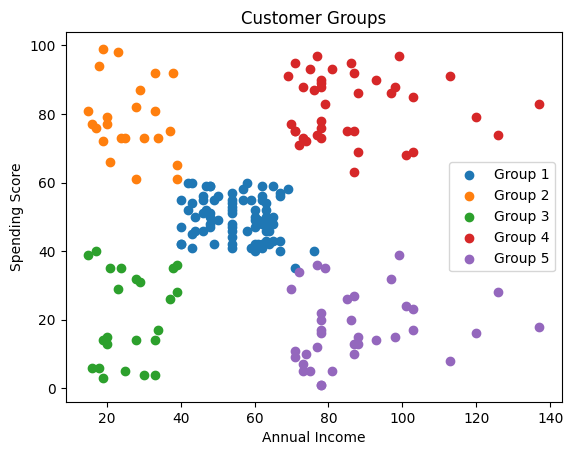

In [ ]:
Groups=train_plot(df,5)
Groups
